# Importing CSV From Git Repo

In [4]:
ds='https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'

import pandas as pd
df=pd.read_csv(ds)
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


##Data Separarting as X And Y

In [5]:
y=df['logS']
y.head()

,logS
0,-2.18
1,-2.00
2,-1.74
3,-1.48
4,-3.04


In [6]:
x=df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data Splitting into Training and Testing sets.

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y_train.count()

915

#Model building

## Linear Regresssion

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)
y_lr_train_pred

array([-4.62646313e+00, -1.88938182e+00, -1.78150889e+00, -6.04286312e+00,
       -1.15087820e+00, -3.43527257e+00, -4.26957355e+00, -2.58589501e+00,
       -2.10621190e+00, -1.75392631e+00, -2.56053266e+00, -5.37840729e+00,
       -1.70897682e+00, -3.71986714e+00, -3.12181810e+00, -3.80041120e+00,
       -2.05841207e+00, -3.16102536e+00, -2.81226538e+00, -2.33569534e+00,
       -4.31855699e+00, -3.12310870e+00, -3.12310870e+00, -1.33519828e+00,
       -1.36456530e+00, -1.21875723e+00, -5.80670991e+00, -1.85446831e+00,
       -4.19988617e+00, -3.43321139e+00, -4.36524086e+00, -3.51796857e+00,
       -2.17235701e-01, -2.54229508e+00, -2.12593528e+00, -1.50900351e+00,
       -4.92531381e+00, -2.50553709e+00, -7.79403163e+00, -4.08419741e+00,
       -1.87159788e+00, -6.03130733e+00, -2.14863525e+00, -2.30139947e+00,
       -7.10142817e-01, -1.85794411e+00, -4.91629537e+00, -1.74662354e+00,
       -1.03736524e+00, -4.21932222e+00,  6.09871155e-01, -6.62523788e+00,
       -7.42931083e+00, -

In [24]:
y_lr_test_pred

array([-5.51011823, -2.43365925, -1.98068317, -3.88446679, -0.45800061,
       -2.00998658, -4.18284236, -3.25749844, -1.32641098, -1.49119   ,
       -3.86287224, -3.43314805, -4.06836239, -4.21891564, -1.19406964,
       -2.29201312, -1.14970888, -5.51011823, -6.07024377, -1.6447113 ,
       -3.54537259, -4.35778789, -1.79578322, -0.98172215, -5.28207689,
       -4.98688162, -2.89525539, -1.59892912, -0.51514848, -3.3649635 ,
       -1.52844007, -1.59916511, -9.17727951, -1.11081169, -5.33190425,
       -3.67224603, -2.05848935, -3.58403533, -3.63996403, -3.78696471,
       -1.79773935, -2.13821088, -7.87998141, -1.51201446, -1.60030486,
       -2.39831689, -3.88257471, -4.4155422 , -0.40850316, -2.77171191,
       -3.02652696,  1.490639  , -3.32592331, -3.5072785 , -5.33339929,
       -3.71986714, -2.61779505, -2.02871599, -4.17160885, -4.50882224,
       -1.1508782 , -3.81685449, -1.90887752, -0.11478655, -3.96308746,
       -2.66501239, -2.54677532, -2.11701143, -1.92806432, -3.18

### Training model

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)
lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [32]:
print('LR MSE (Train):',lr_train_mse)
print('LR R2 (Test):',lr_test_r2)
print('LR MSE (Train):',lr_train_mse)
print('LR R2 (Test):',lr_test_r2)


LR MSE (Train): 1.012430588146713
LR R2 (Test): 0.7790588831553226
LR MSE (Train): 1.012430588146713
LR R2 (Test): 0.7790588831553226


In [61]:
import pandas as pd
lr_results=pd.DataFrame(['Linear Regression',lr_train_mse,lr_test_r2,lr_train_mse,lr_test_r2]).transpose()
lr_results

,0,1,2,3,4
0,Linear Regression,1.012431,0.779059,1.012431,0.779059


In [62]:
lr_results.columns=['Model','Train MSE','Test MSE','Train R2','Test R2']
lr_results

,Model,Train MSE,Test MSE,Train R2,Test R2
0,Linear Regression,1.012431,0.779059,1.012431,0.779059


## **Random Forest**

### Training Model

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [42]:
y_rf_train_pred=lr.predict(x_train)
y_rf_test_pred=lr.predict(x_test)
y_rf_train_pred

array([-4.62646313e+00, -1.88938182e+00, -1.78150889e+00, -6.04286312e+00,
       -1.15087820e+00, -3.43527257e+00, -4.26957355e+00, -2.58589501e+00,
       -2.10621190e+00, -1.75392631e+00, -2.56053266e+00, -5.37840729e+00,
       -1.70897682e+00, -3.71986714e+00, -3.12181810e+00, -3.80041120e+00,
       -2.05841207e+00, -3.16102536e+00, -2.81226538e+00, -2.33569534e+00,
       -4.31855699e+00, -3.12310870e+00, -3.12310870e+00, -1.33519828e+00,
       -1.36456530e+00, -1.21875723e+00, -5.80670991e+00, -1.85446831e+00,
       -4.19988617e+00, -3.43321139e+00, -4.36524086e+00, -3.51796857e+00,
       -2.17235701e-01, -2.54229508e+00, -2.12593528e+00, -1.50900351e+00,
       -4.92531381e+00, -2.50553709e+00, -7.79403163e+00, -4.08419741e+00,
       -1.87159788e+00, -6.03130733e+00, -2.14863525e+00, -2.30139947e+00,
       -7.10142817e-01, -1.85794411e+00, -4.91629537e+00, -1.74662354e+00,
       -1.03736524e+00, -4.21932222e+00,  6.09871155e-01, -6.62523788e+00,
       -7.42931083e+00, -

In [49]:
from sklearn.metrics import mean_squared_error,r2_score
rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)
rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)

In [50]:
print('LR MSE (Train):',rf_train_mse)
print('LR R2 (Test):',rf_test_r2)
print('LR MSE (Train):',rf_train_mse)
print('LR R2 (Test):',rf_test_r2)


LR MSE (Train): 1.012430588146713
LR R2 (Test): 0.7790588831553226
LR MSE (Train): 1.012430588146713
LR R2 (Test): 0.7790588831553226


In [63]:
import pandas as pd
rf_results=pd.DataFrame(['Random Forest',rf_train_mse,rf_test_r2,rf_train_mse,rf_test_r2]).transpose()
rf_results

,0,1,2,3,4
0,Random Forest,1.012431,0.779059,1.012431,0.779059


In [64]:
rf_results.columns=['Model','Train MSE','Test MSE','Train R2','Test R2']
rf_results

,Model,Train MSE,Test MSE,Train R2,Test R2
0,Random Forest,1.012431,0.779059,1.012431,0.779059


In [66]:
concat_results=pd.concat([lr_results,rf_results],axis=0)
concat_results


,Model,Train MSE,Test MSE,Train R2,Test R2
0,Linear Regression,1.012431,0.779059,1.012431,0.779059
0,Random Forest,1.012431,0.779059,1.012431,0.779059


# Visualizing The Prediction With Actual Results

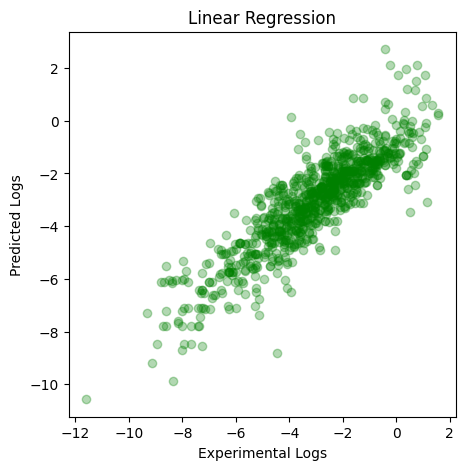

In [72]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(y_train,y_lr_train_pred,c='g',alpha=0.3)
plt.xlabel('Experimental Logs')
plt.ylabel('Predicted Logs')
plt.title('Linear Regression')
plt.show()